In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [4]:
df.tail()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,NaN,NaN


In [5]:
df.size

22000

In [6]:
df.shape

(2200, 10)

In [7]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [8]:
df = df.drop(columns=['Unnamed: 8', 'Unnamed: 9'])

In [9]:
df.columns

Index(['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

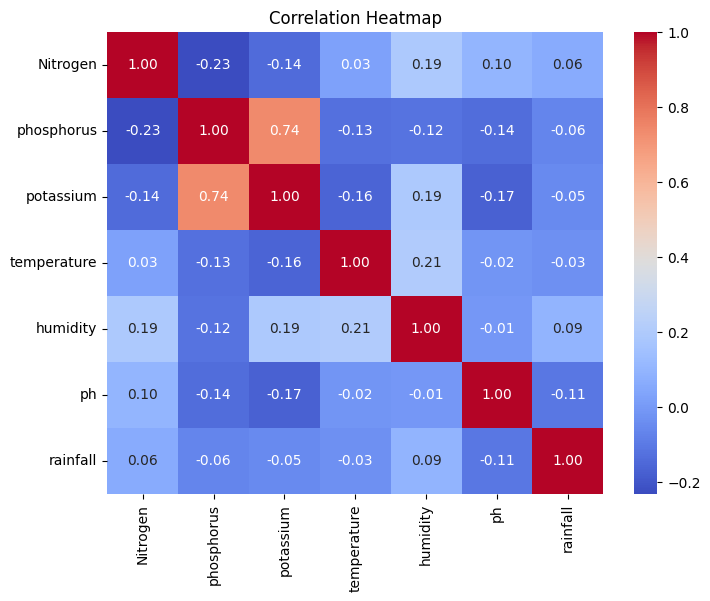

In [13]:
data = df.drop(columns=['label'])
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
features = df[['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph',
       'rainfall']]
target = df['label']
labels = df['label']

In [15]:
acc = []
model = []

In [16]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

In [18]:
DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [19]:
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  90.0


In [20]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

In [25]:
predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

RF's Accuracy is:  0.990909090909091


In [26]:
print(classification_report(Ytest,predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [27]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


In [29]:
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)


SVC(C=1, kernel='poly')

In [30]:
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [31]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [32]:
from sklearn.linear_model import LogisticRegression



In [33]:
LogReg = LogisticRegression(random_state=2)
LogReg.fit(Xtrain,Ytrain)
predicted_values = LogReg.predict(Xtest)

In [34]:
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [35]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96363636, 0.94318182])

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

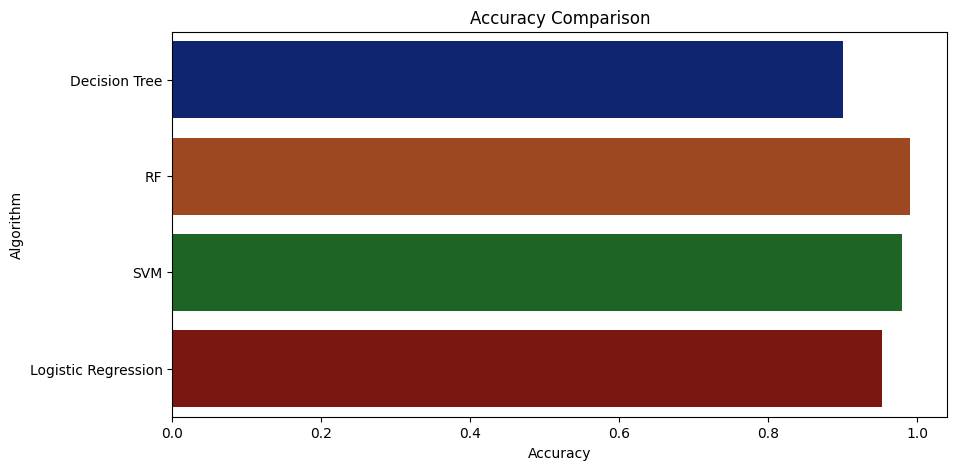

In [36]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [37]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
RF --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273


In [38]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [39]:
data = np.array([[134,16, 20, 13.603016, 40.3, 4.7, 180.91]])
prediction = RF.predict(data)
print(prediction)


['coffee']


In [40]:
data = np.array([[10,8, 3, 13.603016, 20.3, 3.7, 100.64]])
prediction = RF.predict(data)
print(prediction)

['kidneybeans']


In [41]:
import pickle


In [42]:
RF_pkl_file = '/home/niranjan/Desktop/projects/Datascience/Socital Project/Datasets/models/RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_file, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()
